### Setup & Data Loading
Importing necessary libraries for visualization and loading the forecasted dataset (2025-2026 predictions).

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# load the dataset
data = pd.read_csv("uganda_rainfall_forecasts_2025_2026.csv")
data

,district,region,date,predicted_rainfall_mm
0,Abim,Northern,2025-11,62.380427
1,Abim,Northern,2025-12,18.433460
2,Abim,Northern,2026-01,9.236691
3,Abim,Northern,2026-02,27.251833
4,Abim,Northern,2026-03,62.001633
...,...,...,...,...
1675,Zombo,Northern,2026-08,141.116491
1676,Zombo,Northern,2026-09,147.382386
1677,Zombo,Northern,2026-10,165.604378
1678,Zombo,Northern,2026-11,105.866344


### Basic Inspection
Checking the summary statistics of the predictions to ensure values are realistic (e.g., no negative rainfall) and understanding the data range.

In [22]:
data.describe()

,predicted_rainfall_mm
count,1680.000000
mean,117.317824
std,54.007667
min,5.906816
25%,75.580192
50%,119.581416
75%,154.745099
max,261.825505


### Data Integrity Check
Verifying that there are no missing values in our forecast file.

In [23]:
print(data.isnull().sum())

district                 0
region                   0
date                     0
predicted_rainfall_mm    0
dtype: int64


### Structure Verification
Checking column data types to ensure dates are parsed correctly and memory usage is optimized.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   district               1680 non-null   object 
 1   region                 1680 non-null   object 
 2   date                   1680 non-null   object 
 3   predicted_rainfall_mm  1680 non-null   float64
dtypes: float64(1), object(3)
memory usage: 52.6+ KB


### Temporal Trend Analysis (Seasonality)
Aggregating predictions to the national level to visualize the seasonal cycle. We expect to see a bimodal pattern (MAM and SON peaks) consistent with Uganda's climate.

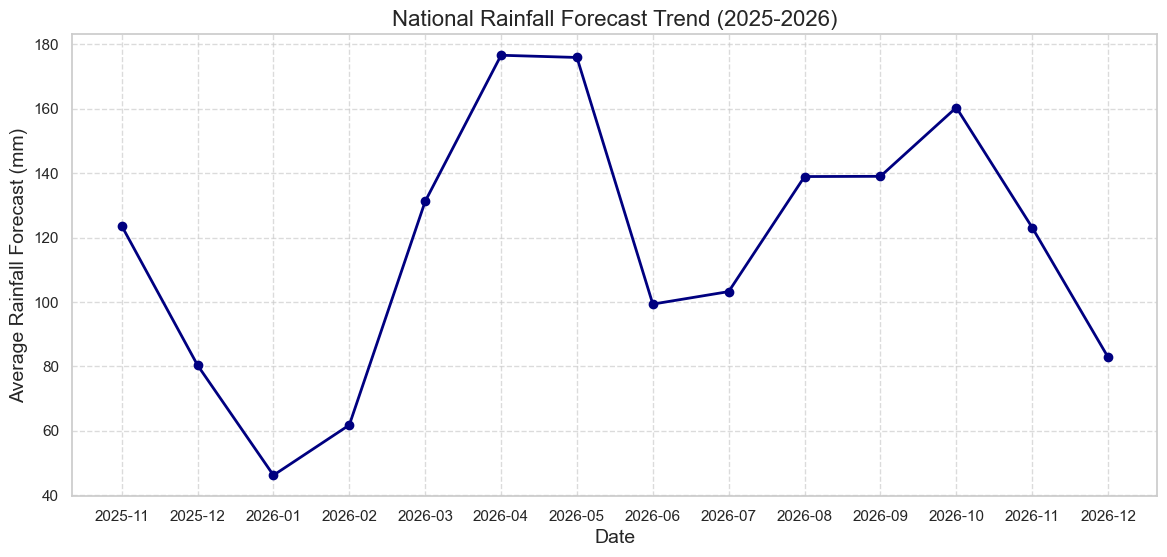

In [25]:
national_trend = data.groupby("date")["predicted_rainfall_mm"].mean()

# Plot the national trend
plt.figure(figsize=(14, 6))
plt.plot(
    national_trend.index,
    national_trend.values,
    marker="o",
    linestyle="-",
    color="navy",
    linewidth=2,
)
plt.title("National Rainfall Forecast Trend (2025-2026)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Average Rainfall Forecast (mm)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

### Spatial Analysis: Wettest vs. Driest
Identifying which districts are predicted to receive the most and least rainfall over the forecast period. This helps identify high-risk zones for floods (top) and drought (bottom).

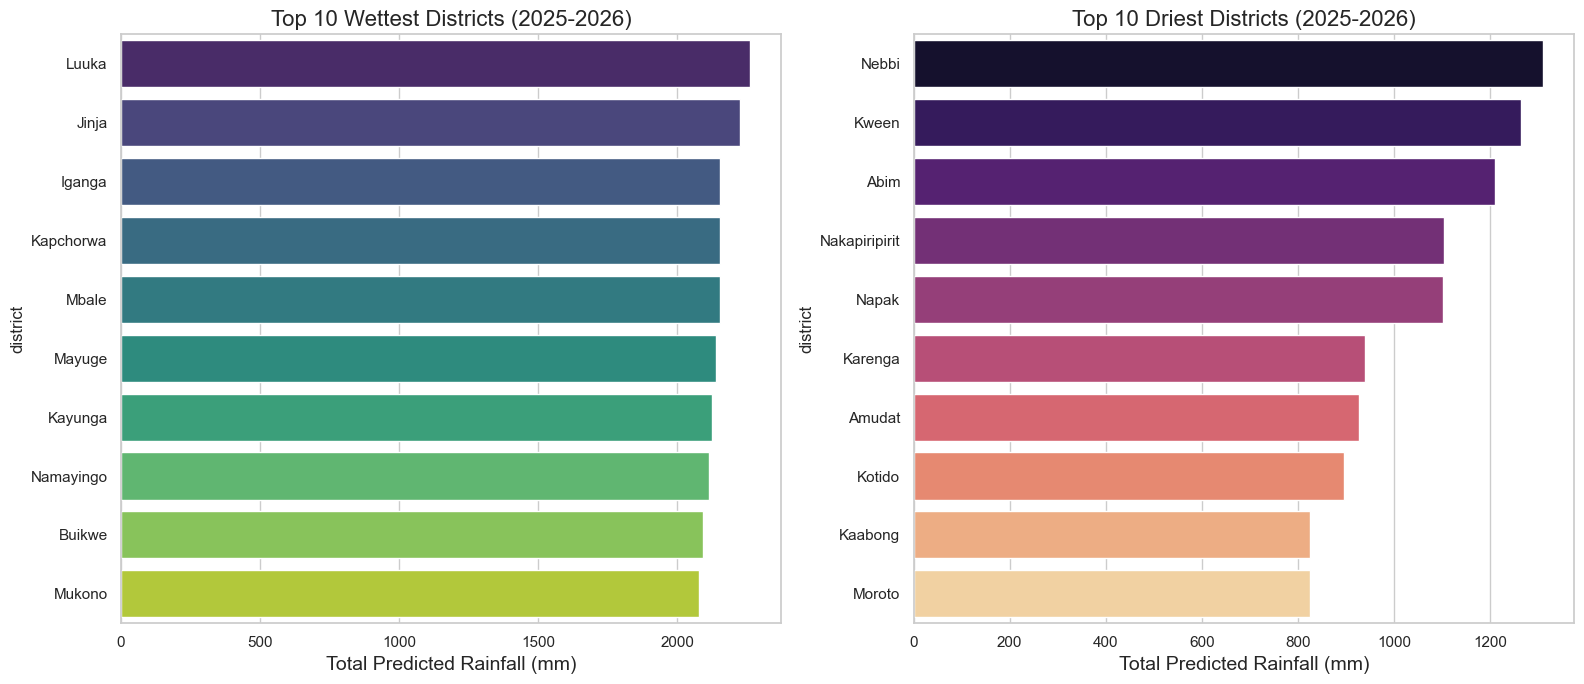

In [26]:
# Total predicted rainfall by district
district_totals = (
    data.groupby("district")["predicted_rainfall_mm"].sum().sort_values(ascending=False)
)

top_districts = district_totals.head(10)
bottom_districts = district_totals.tail(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# plot wettest districts
sns.barplot(
    x=top_districts.values,
    y=top_districts.index,
    ax=axes[0],
    palette="viridis",
    hue=top_districts.index,
    legend=False,
)
axes[0].set_title("Top 10 Wettest Districts (2025-2026)", fontsize=16)
axes[0].set_xlabel("Total Predicted Rainfall (mm)", fontsize=14)

# plot driest districts
sns.barplot(
    x=bottom_districts.values,
    y=bottom_districts.index,
    ax=axes[1],
    palette="magma",
    hue=bottom_districts.index,
    legend=False,
)
axes[1].set_title("Top 10 Driest Districts (2025-2026)", fontsize=16)
axes[1].set_xlabel("Total Predicted Rainfall (mm)", fontsize=14)

plt.tight_layout()
plt.show()

### Forecast Distribution
Visualizing the frequency distribution of predicted rainfall. We check for a right-skewed distribution, which is typical for precipitation data (many dry/moderate months, few extreme wet months).

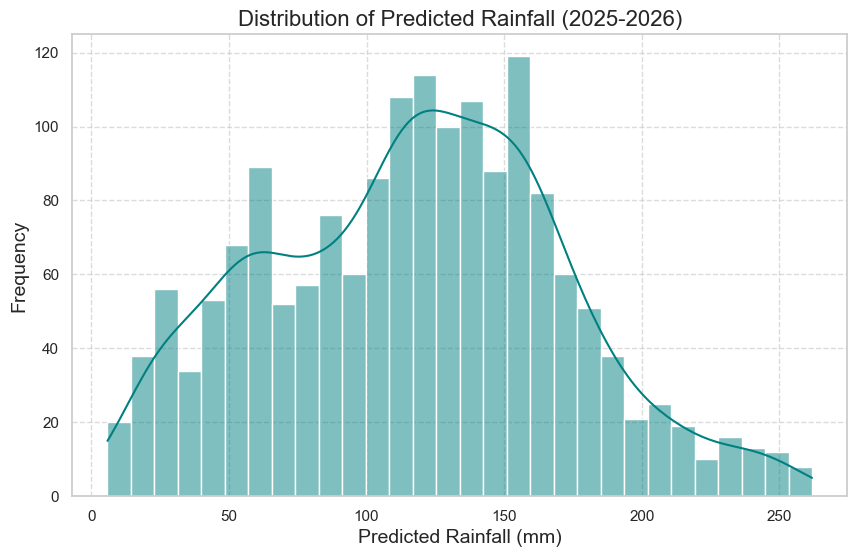

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data["predicted_rainfall_mm"], bins=30, kde=True, color="teal")
plt.title("Distribution of Predicted Rainfall (2025-2026)", fontsize=16)
plt.xlabel("Predicted Rainfall (mm)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

### Regional Analysis
Grouping districts by their macro-region (Central, Northern, Eastern, Western) to compare their distinct climate signatures. We look for differences in season onset and intensity.

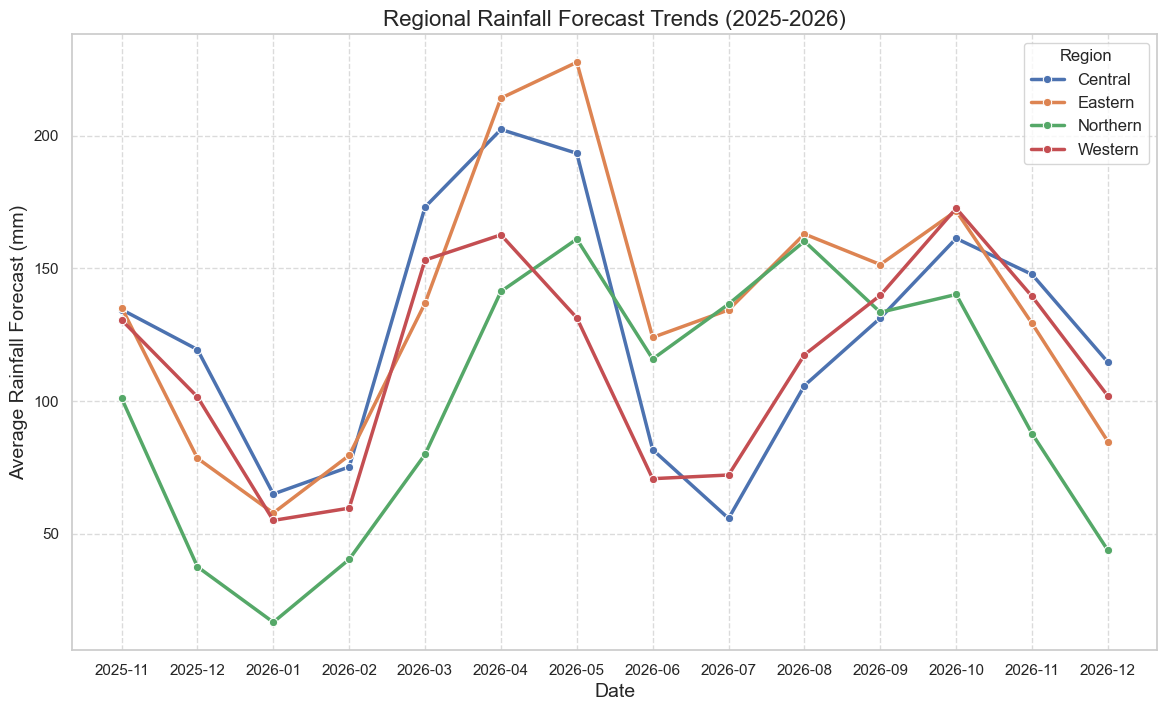

In [28]:
regional_trends = (
    data.groupby(["region", "date"])["predicted_rainfall_mm"].mean().reset_index()
)

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=regional_trends,
    x="date",
    y="predicted_rainfall_mm",
    hue="region",
    marker="o",
    linewidth=2.5,
    palette="deep",
)
plt.title("Regional Rainfall Forecast Trends (2025-2026)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Average Rainfall Forecast (mm)", fontsize=14)
plt.legend(title="Region", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()